## Show some operations when combine multiple images together

In [3]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

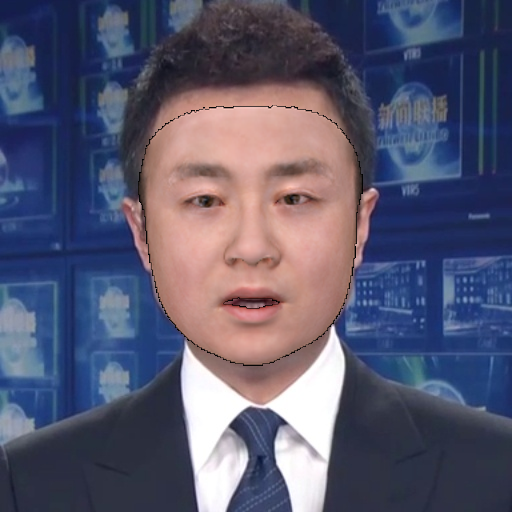

In [15]:
image_1_path = "/home/haimingzhang/Research/Programming/cv-fighter/facial_preprocessed/video_preprocessed/id00001/gangqiang_5/deep3dface_512/000400.png"
image_2_path = "/home/haimingzhang/Research/Programming/cv-fighter/facial_preprocessed/video_preprocessed/id00001/gangqiang_5/face_image/000400.jpg"

image_1 = cv2.imread(image_1_path)
image_2 = cv2.imread(image_2_path)

mask = np.expand_dims(cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY) > 0, -1)

output_image =  image_1 * mask + image_2 * (1 - mask)
output_image = output_image.astype(np.uint8)

display(Image.fromarray(output_image[..., ::-1]))

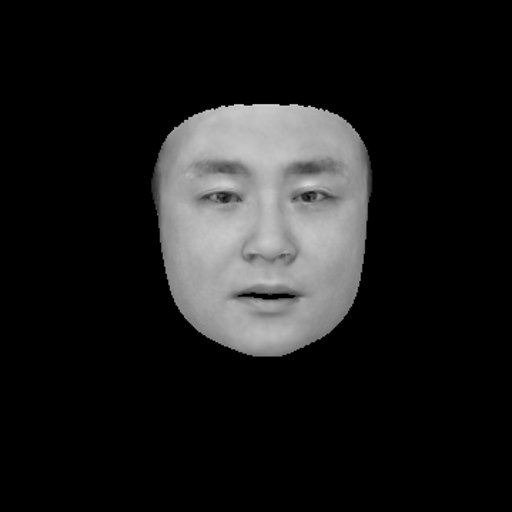

In [34]:
mask_img = "/home/haimingzhang/Research/Programming/cv-fighter/facial_preprocessed/video_preprocessed/id00001/gangqiang_5/deep3dface_512/000078.png"
mask_img = cv2.imread(mask_img)

mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(mask_img))

mask_img[mask_img > 0] = 255



### Seamless Clone

In [37]:
def swap_masked_region(target_img, src_img, mask):
    """From src_img crop masked region to replace corresponding masked region
       in target_img
    """
    mask_img = cv2.GaussianBlur(mask, (21,21), 11)
    # input1_mask = cv2.bitwise_and(target_img, target_img, mask=cv2.bitwise_not(mask_img))
    # input2_mask = cv2.bitwise_and(src_img, src_img, mask=mask)

    # img = cv2.addWeighted(input1_mask, 1, input2_mask, 1, 0)
    mask1 = mask_img / 255
    mask1 = np.tile(np.expand_dims(mask1, axis=2), (1,1,3))
    # print(f"mask1 time is {time.time()-start}")
    img = src_img * mask1 + target_img * (1 - mask1)
    # foreground = cv2.multiply(src_img.astype(np.float), mask1)
    # background = cv2.multiply(1.0 - mask1, target_img.astype(np.float))
    # img = cv2.add(foreground, background)
    return img.astype(np.uint8)

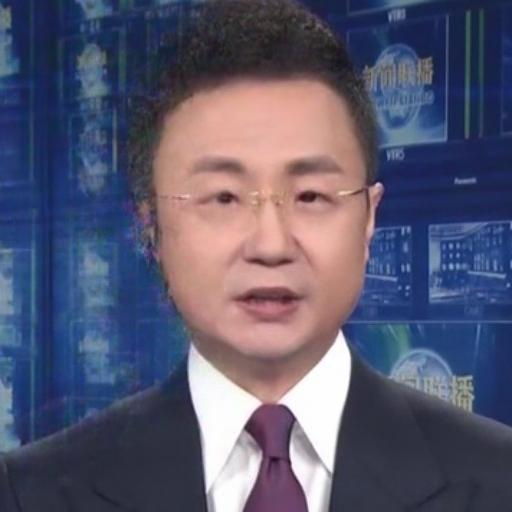

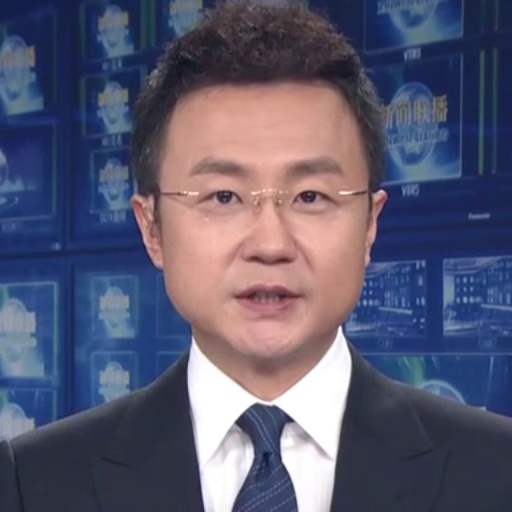

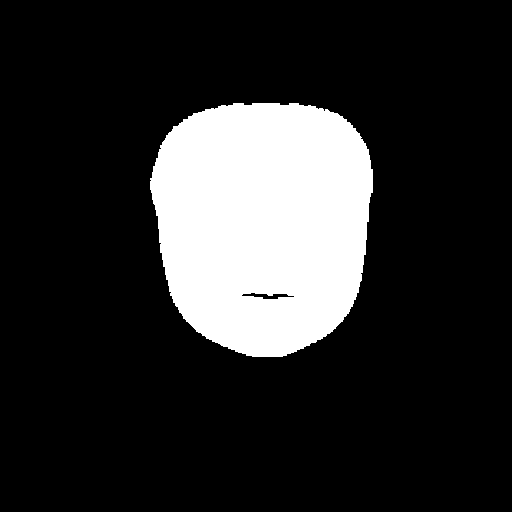

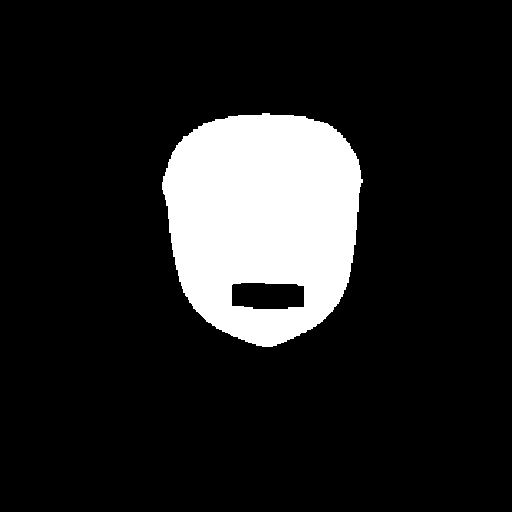

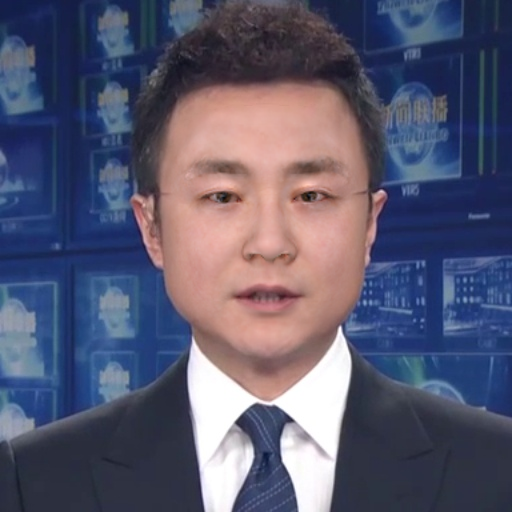

In [56]:
src_img = "/home/haimingzhang/Research/Face/FACIAL/examples/test_image/gangqiang5/000078.jpg"
dst_img = "/home/haimingzhang/Research/Programming/cv-fighter/facial_preprocessed/video_preprocessed/id00001/gangqiang_5/face_image/000078.jpg"
mask_img = "/home/haimingzhang/Research/Programming/cv-fighter/facial_preprocessed/video_preprocessed/id00001/gangqiang_5/deep3dface_512/000078.png"

src_img = cv2.imread(src_img)
dst_img = cv2.imread(dst_img)
mask_img = cv2.imread(mask_img)

origin_mask_img = mask_img.copy()

mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
mask_img[mask_img > 0] = 255

kernel = np.ones((21, 21), np.uint8)  
erosion = cv2.erode(mask_img, kernel, iterations = 1)

# mask_img = mask_img.astype(np.uint8)

# mask_img = np.ones(src_img.shape, src_img.dtype) * 255

display(Image.fromarray(src_img[..., ::-1]))

display(Image.fromarray(dst_img[..., ::-1]))

display(Image.fromarray(mask_img))
display(Image.fromarray(erosion))


output = swap_masked_region(dst_img, origin_mask_img, erosion)
# output = cv2.seamlessClone(src_img, dst_img, mask_img, (256, 256), cv2.NORMAL_CLONE)
display(Image.fromarray(output[..., ::-1]))